# GMIT - Fundamentals of Data Analysis
## <font color='purple'>**Assessment 2019: Tips dataset Analysis**</font>

![Image](https://www.tripsavvy.com/thmb/aXTGXSsrJi9QYh3RPCzNfLhu63E=/950x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-184868831-5c352fd746e0fb00017c4bc7.jpg)

### **About Tips dataset**
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. 

**Each record includes:**
-	Total bill - Total bill (cost of the meal), including tax, in US dollars
-	Tip - Tip (gratuity) in US dollars
-	Sex - Sex of person paying for the meal (male/female)
-	Smoker - Smoker in party? (No/Yes)
-	Day - Thursday, Friday, Saturday or Sunday
-	Time - Day or Night
-	Size - Size of the party

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

In [4]:
# Importing the tips dataset from the local file
df = pd.read_csv("Tips.csv")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

### **<font color='purple'>Descriptive statistics</font>**

#### **Qualitative Data**

The Tips dataset includes the following Qualitative data:
- Sex
- Smoker
- Day
- Time

Let's check how the qualitative data are distributed in our sample dataset. In the graphs below we are checking if our dataset has equal amount of Female vs Male, Non-smokers vs Smokers, how many Lunches vs Dinners were recorded and if we had the same amount of records done every  day within 4 days (from Thursday to Sunday).

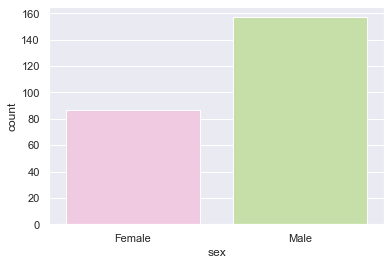

In [48]:
sns.countplot(x="sex", data=df, palette="PiYG")

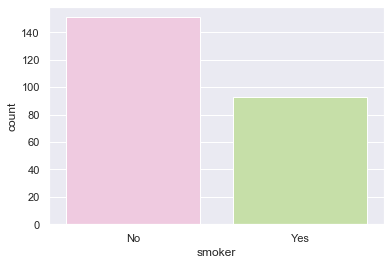

In [49]:
sns.countplot(x="smoker", data=df, palette="PiYG")

As we can see from the graphs above, our sample contains more Males than Females as well as more Non-smokers rathen than smokers.

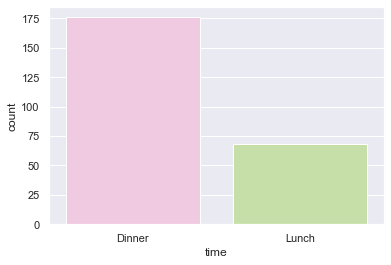

In [50]:
sns.countplot(x="time", data=df, palette="PiYG")

This chart shows that number of time DIneers and Lunches is not equal in our sample as well. The datasat contains more records for Dinner rather than Lunch.

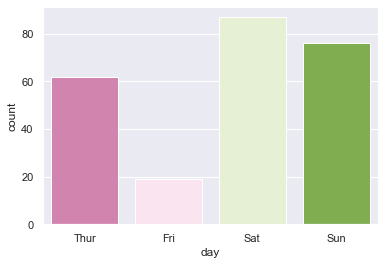

In [43]:
order = ["Thur", "Fri", "Sat", "Sun"]
sns.countplot(x="day", data=df, palette="PiYG",order=order)

The bar chart above shows that the most data was collected during Saturday and Sunday, the least - on Friday.

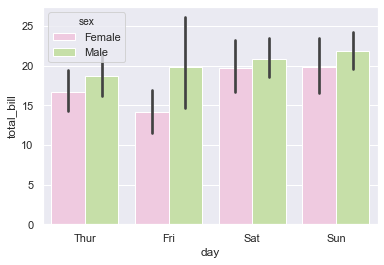

In [44]:
sns.barplot(x="day", y="total_bill", hue="sex", data=df, palette="PiYG", order=order)

The following script plots box plots for total bill per weekday where the bill is paid by a smoker or Non-smoker.

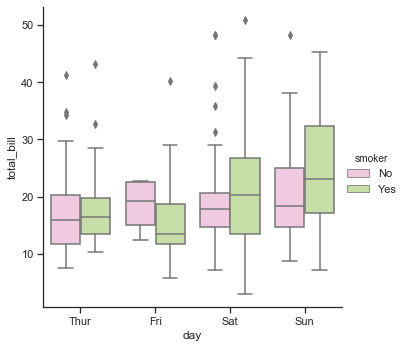

In [63]:
sns.catplot(x="day", y="total_bill", hue="smoker", data=df, palette="PiYG", kind="box", order=order)

You can see that on Friday, Saturday and Sunday, smokers paid more bills than non-smokers. Furthermore, the average bill paid on Friday by smokers is significantly lower, compared to the average bill paid by non-smokers. On Thursday the average bill is almost the same for both categories, with a slight rise on Saturday for smokers. The biggest difference between average bills payed by smokers and non-smokers was on Sunday.

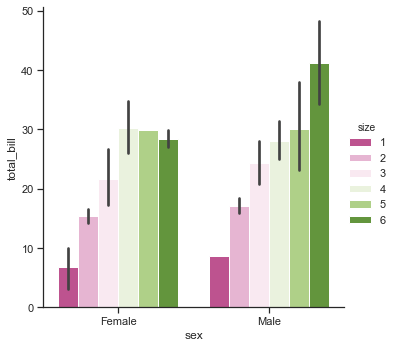

In [69]:
sns.catplot(x="sex", y="total_bill", hue="size", kind="bar", data=df, palette="PiYG")

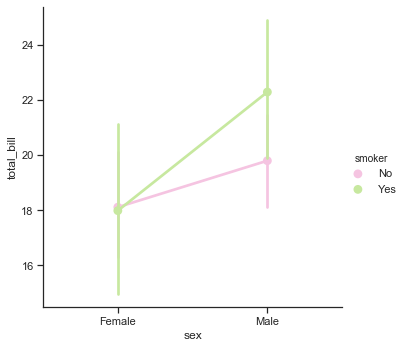

In [72]:
sns.catplot(x="sex", y="total_bill", hue="smoker", kind="point", data=df, palette="PiYG")

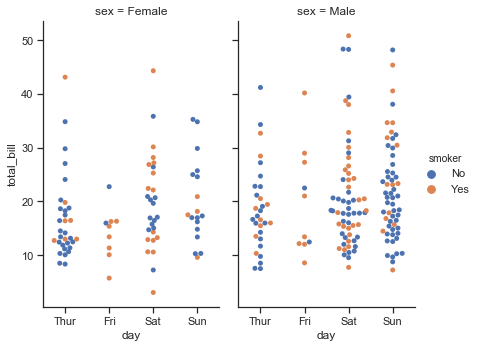

In [80]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="sex", aspect=.6, kind="swarm", data=df, order=order)

#### **Quantitative Data**

The Tips dataset includes the following Quantitative data:
- total bill
- tip
- size of the party

##### **Basic statistics with _.descibe()_**

_.describe()_ is used to see a number of basic statistics about the column, such as the mean, min, max, and standard deviation. This can give you a quick overview of the shape of the data.

Let's apply this function to a particular column of our dataset - Total bill:

In [8]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Here's a quick breakdown of the above as it relates to this particular dataset:

- _**count**:_ there are 244 rows in the dataset.
- _**mean**:_ the average bill.
- _**std**:_ the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. In our case the measurememnts of a total bill are spread of 8.9 to the left and to the right from the average bill (mean). 
- _**min**:_ the smallest bill in the dataset = 3.07 USD
- _**25%**:_ the 25th percentile. 25% of all bills are lower than 13.35 USD.
- _**50%**:_ the 50th percentile, or the median. 50% of bills are lower than 13.80 USD.
- _**75%**:_ the 75th percentile. 75% of bills are lower than 24.13 USD.
- _**max**:_ the highest bill = 50.81 USD.

Also we can visually represent the distribution of the total bills using a **histogram**.

Histogram shows frequency distribution for a particular column in a dataset. For instance, if we want to see how many times the amount of total_bill is between 10-20, 20-30, 30-40 and so on, we can use a histogram.

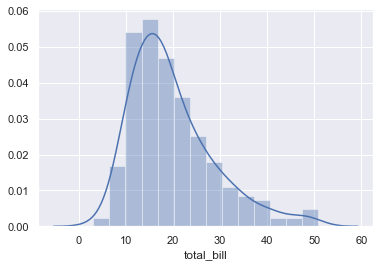

In [7]:
sns.set()
sns.distplot(df['total_bill'])

From this histogram we can see that the most of the bills fall into area betweem 10 and 20 USD.

If we check the value of the median and mean, we'll notice that the median is less than the mean. This explains the right skewness of the histogram.

Now let's look at the Tip distribution:

In [9]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

As we can see the average tip is equal to 3 USD and standard deviation is 1.38. We have a _**small standard deviation**_. The small (low) standard deviation indicates that the values tend to be close to the mean of the set, while a _**high standard deviation**_ indicates that the values are spread out over a wider range.

The smallest tip is equal to 1 USD, and the highest - 10 USD. Median is 2.9 USD.

Let's look at the histogram of the tip distribution:

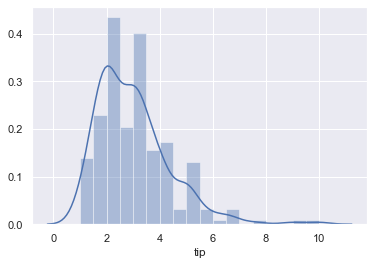

In [6]:
sns.distplot(df['tip'])

The median is smaller then the mean value, therefore our histogram is skewed right as well.

#### **Outliers**

In statistics, an _**outlier**_ is an observation point that is distant from other observations.
The above definition suggests that outlier is something which is separate/different from the population/sample.

There are few visualization tools to discover outliers:
- Box plot
- Scatter plot
- Z-Score
- IQR score


**Box plot**

According to the Wikipedia  a _**box plot**_ is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.

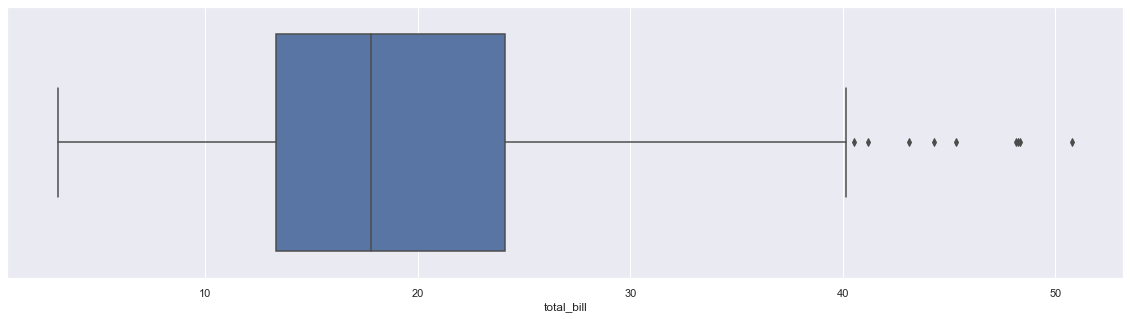

In [28]:
plt.figure(figsize=(20,5))

sns.boxplot(df['total_bill'])

Let's get the values of the Oultiers:

In [31]:
from matplotlib.cbook import boxplot_stats

sorted_array = np.sort(boxplot_stats(df['total_bill']).pop(0)['fliers'])
print(sorted_array)

[40.55 41.19 43.11 44.3  45.35 48.17 48.27 48.33 50.81]


As we can see from the box plot all bill that are higher than 40 USD have been marked as outliers. In our case the box plot highlighted 9 Outliers.

**Scatter plot**

A _**scatter plot**_ is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

The scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables (total bill and tips) from our Tips dataset.

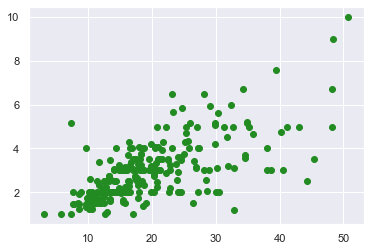

In [23]:
plt.scatter(df['total_bill'], df['tip'], c='forestgreen')

Looking at the plot above, we can see that most of data points are lying bottom left side but there are points which are far from the population like top right corner. These are potential outliers.

**Z-score**

The _**Z-score**_ is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean. However if the thershold is less than -2 or greater than 2, we might identify the possible outliers. From this rule we see that almost all of the data (95%) should be within two standard deviations from the mean.

In [23]:
z = np.abs(stats.zscore(df['total_bill']))
print(z)

[3.14711305e-01 1.06323531e+00 1.37779900e-01 4.38315103e-01
 5.40744704e-01 6.19536705e-01 1.23995452e+00 7.98507107e-01
 5.34203307e-01 5.63468908e-01 1.07111451e+00 1.74175992e+00
 4.91430507e-01 1.52624903e-01 5.57840908e-01 2.01939101e-01
 1.06436091e+00 3.93503306e-01 3.16962505e-01 9.72582994e-02
 2.10030504e-01 5.67366990e-02 4.52034507e-01 2.21000952e+00
 3.83349840e-03 2.22412104e-01 7.22178510e-01 7.98719310e-01
 2.15446301e-01 1.53017018e-02 1.15215771e+00 1.61629703e-01
 5.31952107e-01 1.01760699e-01 2.25788904e-01 4.81087904e-01
 3.91252106e-01 3.21464905e-01 1.23359303e-01 1.29264551e+00
 4.21643306e-01 2.61808105e-01 6.58019309e-01 1.13752491e+00
 1.19471831e+00 1.68383303e-01 2.75103101e-01 1.41983831e+00
 9.86482309e-01 1.96523304e-01 8.15603311e-01 1.06886331e+00
 1.69110792e+00 1.10825931e+00 6.49927905e-01 3.33113020e-02
 2.05129992e+00 7.45603907e-01 9.61931312e-01 3.20616553e+00
 5.67366990e-02 6.72652109e-01 9.86694512e-01 1.68383303e-01
 2.47175304e-01 3.309909

Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [32]:
# treshhold = 3
print(np.where(z > 3))

(array([ 59, 156, 170, 212], dtype=int64),)


The output contains the list of row numbers. Let's look for a total bill values for these rows:

In [41]:
print(df['total_bill'][[59, 156, 170, 212]])

59     48.27
156    48.17
170    50.81
212    48.33
Name: total_bill, dtype: float64


When we were detecting outliers using Box plotting we got 9 Outliers, however in Z-score we got only 4? Why there is a difference? Using Z-score methong we identified the outliers using the treshhold |3|, but we didn't capture the potential outliers. Now we reduce the threshold value to |2| and see if there are any potential outliers:

In [24]:
# treshhold = 2
print(np.where(z > 2))

(array([ 23,  56,  59,  95, 102, 112, 142, 156, 170, 182, 184, 197, 207,
       212], dtype=int64),)


As you can see from the output array includes the actual outliers we got when the threshold was greater than 3. But we can see some new records there. Le'ts check the total bill values for them:

In [25]:
print(df['total_bill'][[23, 56, 95, 102, 112, 142, 182, 184, 197, 207]])

23     39.42
56     38.01
95     40.17
102    44.30
112    38.07
142    41.19
182    45.35
184    40.55
197    43.11
207    38.73
Name: total_bill, dtype: float64


These potential outliers falling into 4.7% group (99.7% - 95%), between two and three standard deviations.

**IQR score**

The _**interquartile range (IQR)**_, also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers. IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR:

In [6]:
# as an example, we are calculating IQE for total bill

Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

10.779999999999998


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [18]:
Outlier = (df['total_bill'] < (Q1 - 1.5 * IQR))|(df['total_bill']> (Q3 + 1.5 * IQR))
[i for i, x in enumerate(Outlier) if x]

[59, 102, 142, 156, 170, 182, 184, 197, 212]

In [32]:
print(df['total_bill'][[59, 102, 142, 156, 170, 182, 184, 197, 212]])

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


We got 9 Outliers - the same as using the box plot. These 9 records were highlighted as potential outliers using Z-score method as well.


 
**Summary**: 
We have tested three different methods to identify the outliers:

| Box plot    |Z-score: Potential |Z-score: Actual|   IQR   |
|-------------|-------------------|---------------|---------|
|             |        38.01      |               |         |
|             |        38.07      |               |         |
|             |        38.73      |               |         |
|             |        39.42      |               |         |
|             |        40.17      |               |         |
|**40.55**    |      **40.55**    |               |**40.55**|
|**41.19**    |      **41.19**    |               |**41.19**|
|**43.11**    |      **43.11**    |               |**43.11**|
|**44.30**    |      **44.30**    |               |**44.30**|
|**45.35**    |      **45.35**    |               |**45.35**|
|**48.17**    |                   |   **48.17**   |**48.17**|
|**48.27**    |                   |   **48.27**   |**48.27**|
|**48.33**    |                   |   **48.33**   |**48.33**|
|**50.81**    |                   |   **50.81**   |**50.81**|


_**Note**_: the values in bold were identified as Outliers using all three methods.

The pair plot is a graph that plots the relationship between all the numeric columns in the form of multiple scatter plots. Along the diagonals, the histogram of the columns is displayed. 

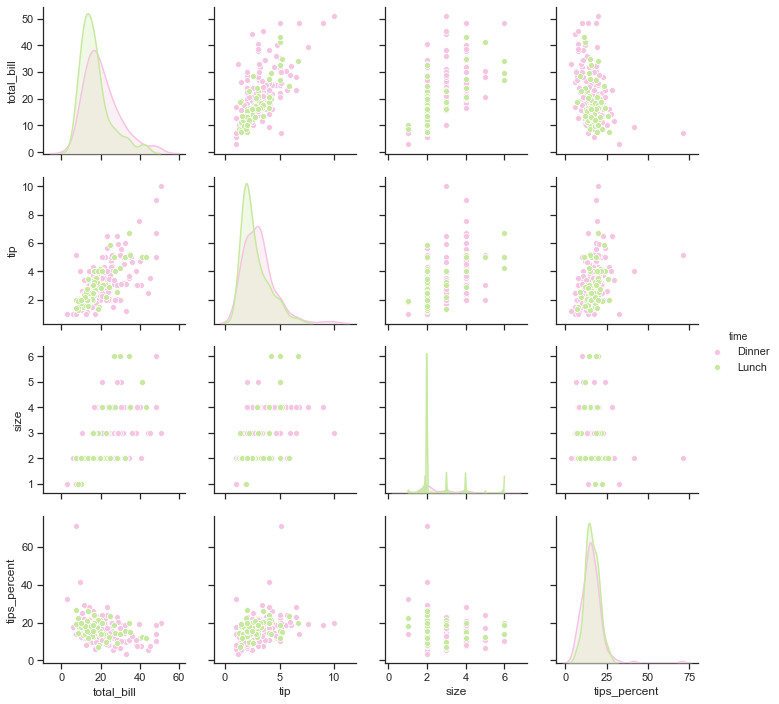

In [55]:
sns.pairplot(df, hue='time', palette="PiYG")

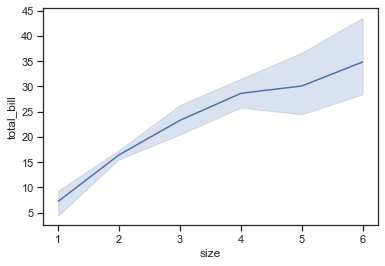

In [56]:
sns.lineplot(x="size", y="total_bill", data=df)

A heat map is a matrix-like plot used to plot the degree of correlation between multiple numerical columns. 

The heatmap() function accepts a dataframe with columns as well as row headers. The tips dataset only contains column headers. To create row headers, you can use the corr() function, which returns the dataset with both column and row headers. You can then use the heatmap() function to plot the heatmap for the dataset as shown below.

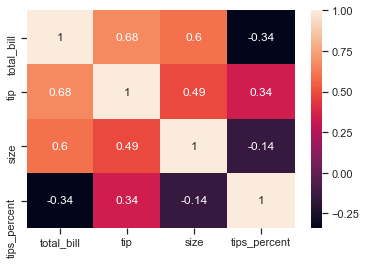

In [84]:
# everythin ok, but remove tips_percent value
corr = df.corr()
sns.heatmap(corr, annot=True)

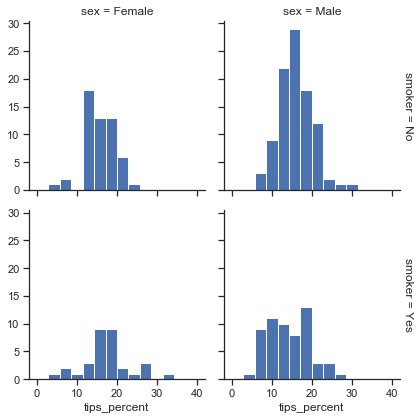

In [58]:
df['tips_percent'] = 100 *(df['tip'] / df['total_bill'])
grid = sns.FacetGrid(df, row = "smoker", col = "sex", margin_titles=True)
grid.map(plt.hist, "tips_percent", bins=np.linspace(0, 40, 15))
# grid = sns.FacetGrid(df, row="sex", col="smoker", margin_titles=True)
# grid.map(plt.hist, "tips_percent", bins=np.linspace(0, 40, 15));

<font color='red'>From the histogram above we can see that the percentage of the most of tips varies between 10% and 20%, however it's interesting that the female smokers and male non-smokers seems to leave higher percentage (above 30% of total bill). </font>